In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df= pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.fillna({'Age': df['Age'].mean()}, inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
X=df.drop(columns='Survived')
y=df['Survived']

In [9]:
X

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [10]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

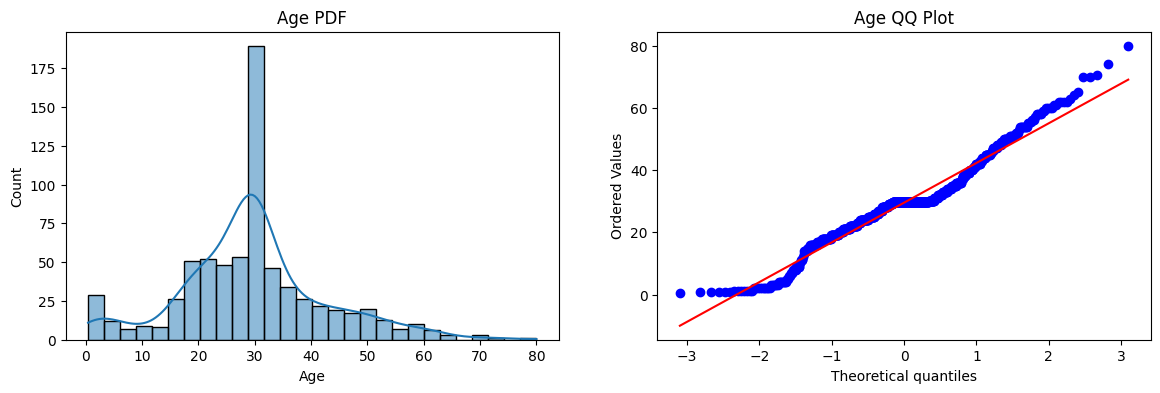

In [12]:
##using hisplot instead of displot since its been deprecated .


plt.figure(figsize=(14, 4))


plt.subplot(121)
sns.histplot(X_train['Age'], kde=True)  
plt.title('Age PDF')


plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()


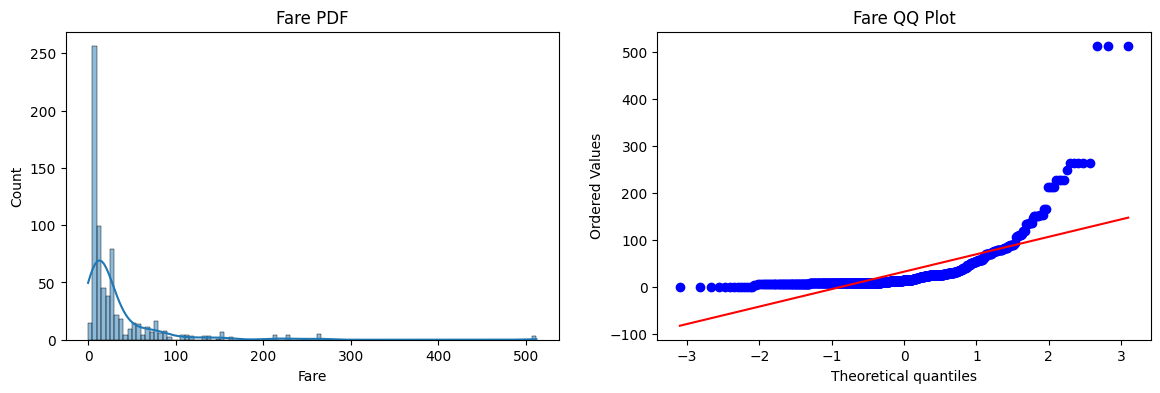

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.figure(figsize=(14, 4))

# Subplot 1: Histogram with KDE for 'Fare'
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True) 
plt.title('Fare PDF')

# Subplot 2: QQ Plot for 'Fare'
plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()


In [14]:
clf= LogisticRegression()
clf2=DecisionTreeClassifier()

In [15]:
clf.fit(X_train,y_train)

LogisticRegression()

In [16]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
y_pred=clf.predict(X_test)

In [18]:
y_pred2=clf2.predict(X_test)

In [19]:
print("Accuracy of logisitic Regression",accuracy_score(y_test,y_pred))
print("Accuracy of DecisionTreeClassifier ",accuracy_score(y_test,y_pred2))

Accuracy of logisitic Regression 0.6480446927374302
Accuracy of DecisionTreeClassifier  0.6703910614525139


## Now after using log Transformer from functionTransformer

In [20]:
trf= FunctionTransformer(func=np.log1p)

In [21]:
X_train_transformed= trf.fit_transform(X_train)
X_test_transformed= trf.transform(X_test)

In [22]:
clf= LogisticRegression()
clf2=DecisionTreeClassifier()

In [23]:
clf.fit(X_train_transformed,y_train)

LogisticRegression()

In [24]:
clf2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [25]:
y_pred=clf.predict(X_test_transformed)

In [26]:
y_pred2=clf2.predict(X_test_transformed)

In [27]:
print("Accuracy of logisitic Regression after transformation",accuracy_score(y_test,y_pred))
print("Accuracy of DecisionTreeClassifier after transformation ",accuracy_score(y_test,y_pred2))

Accuracy of logisitic Regression after transformation 0.6815642458100558
Accuracy of DecisionTreeClassifier after transformation  0.6759776536312849


##### slightly better outcome, DecisionTreeClassifier doesnt have much difference, DecisionTree is one of those algorithms where data ko distribution kasto xa, doesnt matter, but logistic regression has improvement

#### cross validation check

In [28]:
#### transform entire X, ie feature data
X_transformed= trf.fit_transform(X)

In [29]:
clf= LogisticRegression()
clf2=DecisionTreeClassifier()

In [30]:
print("logisitic Regression",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DecisionTreeClassifier",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

logisitic Regression 0.678027465667915
DecisionTreeClassifier 0.6577403245942572


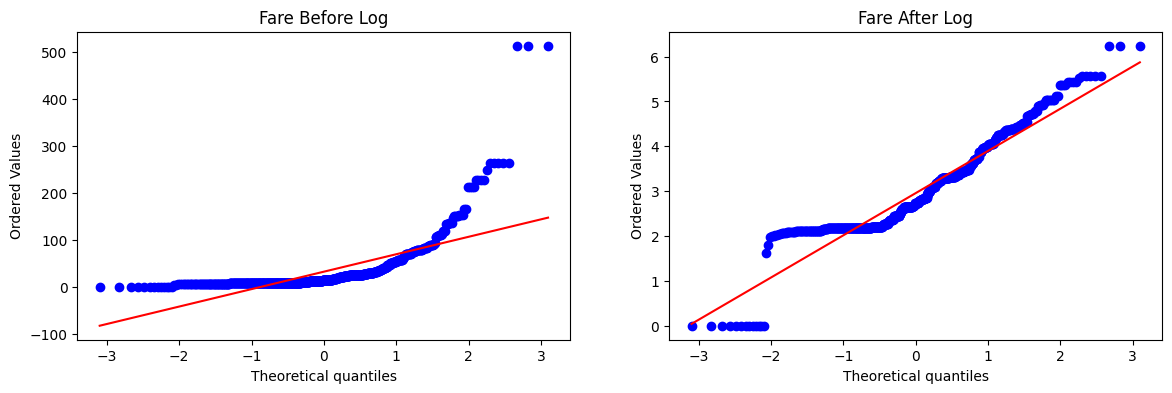

In [31]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

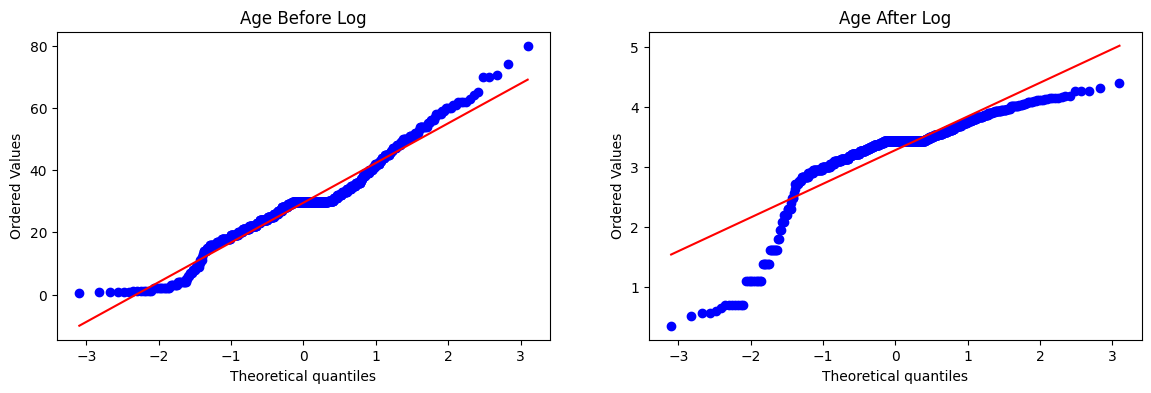

In [32]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

##### for the age case, the distribution was  better  before than after.
##### Since the age column wasnot right  skewed, but we used log transformer,it degraded the plot

#### lets just  use  functiontransformer(ie log) justin fare col

In [41]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

In [42]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [43]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [44]:
clf.fit(X_train_transformed2,y_train)

LogisticRegression()

clf2.fit(X_train_transformed2,y_train)

In [46]:
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

In [47]:
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


#### above accuracy, it should hav improved why didnt it imporove??

In [48]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6644319600499375


#### in nutshell, in the data, age was almost normally distrubuted
#### fare,was right skewed, so after applying log transfrom and logestric regression, it imporved
#### second obseravation, we also did decisiontree, no difference seen before and after .

## accuracy and qq plot before and after

In [51]:
def apply_transform(transform):
    X=df.drop(columns='Survived')
    y=df['Survived']
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

#### no transformation

Accuracy 0.6589013732833957


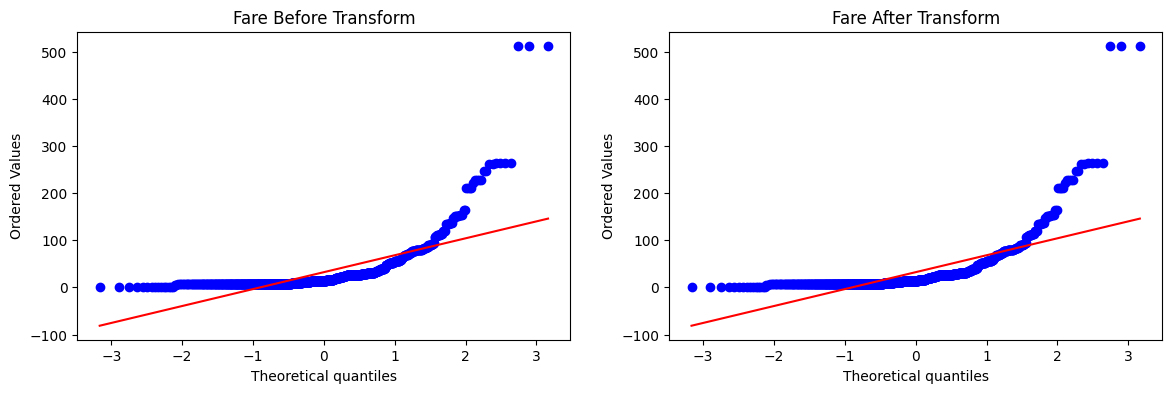

In [55]:
apply_transform(lambda x:x)

#### square 

Accuracy 0.6431335830212235


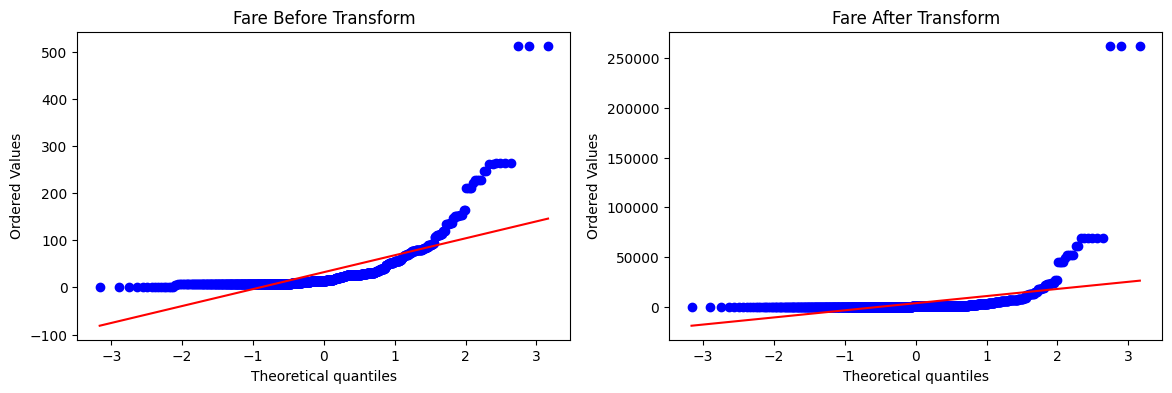

In [56]:
apply_transform(lambda x:x**2)

#### square root

Accuracy 0.6589013732833957


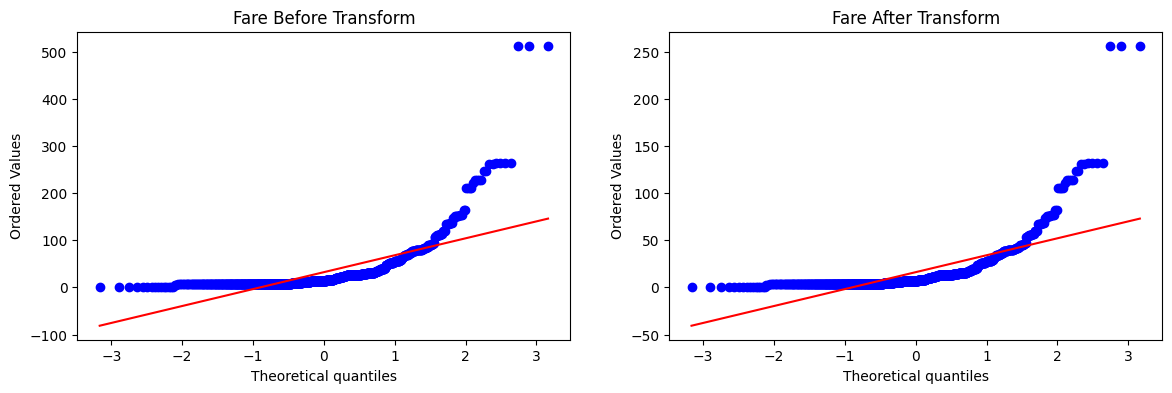

In [57]:
apply_transform(lambda x:x**1/2)

#### reciprocal

Accuracy 0.61729088639201


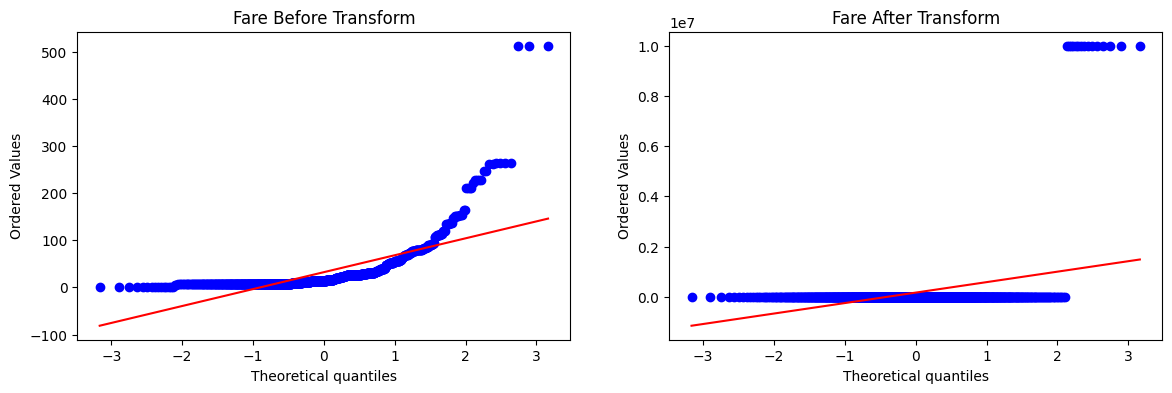

In [62]:
apply_transform(lambda x: 1/(x+0.0000001))

Accuracy 0.6195131086142323


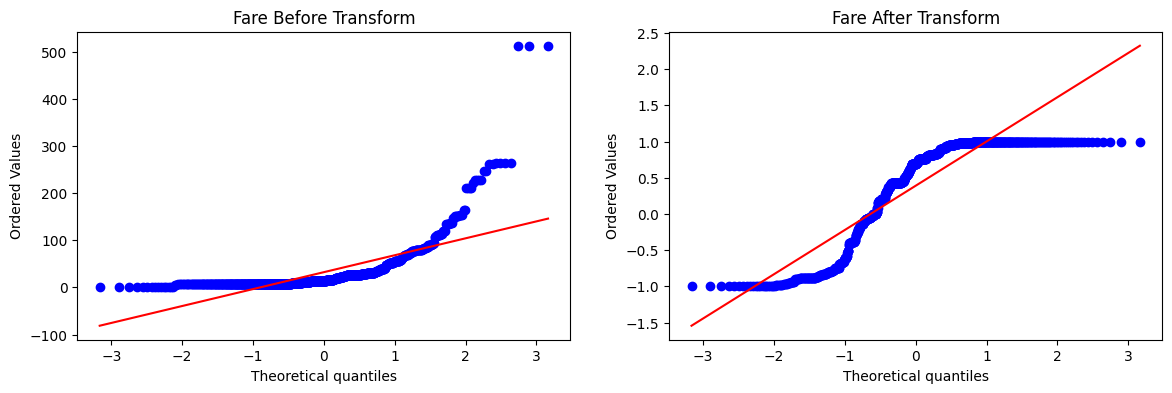

In [52]:
apply_transform(np.sin)